<a href="https://colab.research.google.com/github/RicardoLelis/ML-DS-Code/blob/main/linear_regression_4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

0 8.647179
100 2.649616
200 1.4453382
300 1.1988815
400 1.1484432
500 1.138121
600 1.1360086
700 1.1355762
800 1.1354878
900 1.1354698
learned parameters: [ 1.3602293  -0.23459339]


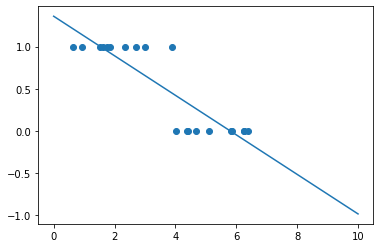

In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)

labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

# Hyperparameters
learning_rate = 0.001
training_epochs = 1000

# Sets up the placeholder nodes for the input/output pairs
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")

# Defines a linear y = w1 * x + w0 model
def model(X, w):
  return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters")

y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y-y_model))

train_op = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

# Runs the learning operation multiple times
for epoch in range(training_epochs):
  sess.run(train_op, feed_dict={X: xs, Y: labels})
  # Records the cost computed with the current parameters
  current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
  if epoch % 100 == 0:
    print(epoch, current_cost)

w_val = sess.run(w)
print('learned parameters:', w_val)

sess.close()

# Shows the best-fit line
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()


In [3]:
## Measuring accuracy

0 8.20907
100 3.5713494
200 2.1599095
300 1.7084835
400 1.5641031
500 1.5179255
600 1.5031564
700 1.4984329
800 1.496922
900 1.4964387
learned parameters: [ 1.4918636  -0.27223492]
Instructions for updating:
Use `tf.cast` instead.
Accuracy: 0.95


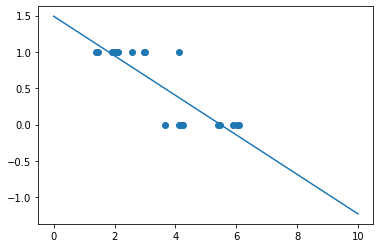

In [8]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)

labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

# Hyperparameters
learning_rate = 0.001
training_epochs = 1000

# Sets up the placeholder nodes for the input/output pairs
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")

# Defines a linear y = w1 * x + w0 model
def model(X, w):
  return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters")

y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y-y_model))

train_op = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

# Runs the learning operation multiple times
for epoch in range(training_epochs):
  sess.run(train_op, feed_dict={X: xs, Y: labels})
  # Records the cost computed with the current parameters
  current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
  if epoch % 100 == 0:
    print(epoch, current_cost)

w_val = sess.run(w)
print('learned parameters:', w_val)

# Measuring accuracy:
correct_prediction = tf.equal(Y, tf.compat.v1.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.compat.v1.to_float(correct_prediction))

print('Accuracy:', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

# Shows the best-fit line
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()